In [16]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import math

In [2]:
tickers = ["AMT", "CCI", "PLD"]
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2020, 9, 30)

In [3]:
reits = pd.DataFrame()
for i in tickers:
    reits[i] = wb.DataReader(i, "yahoo", start, end)["Adj Close"]

In [4]:
#Change investment variable accordingly
investment = 5000
reits = round(reits, 2)

In [5]:
shares_bought = []
for i in tickers:
    shares_bought.append(math.floor(investment / reits[i][0]))

In [6]:
shares_bought

accumulation = reits * shares_bought

In [7]:
#if you wanna plot how much is accumulated
#accumulation["Portfolio Value"] = accumulation.sum(axis=1)

spy = wb.DataReader("SPY", "yahoo", start, end)["Adj Close"]
spy_bought = math.floor(investment / spy[0])

In [8]:
accumulation["S & P"] = spy_bought * spy

In [9]:
accumulation

,AMT,CCI,PLD,S & P
Date,,,,
2010-01-04,4996.35,4984.0,4995.2,4939.687408
2010-01-05,5078.70,5032.0,5068.0,4952.764297
2010-01-06,5105.70,4960.0,5020.4,4956.250946
2010-01-07,5090.85,4878.4,5062.4,4977.173721
2010-01-08,5101.65,4902.4,5048.4,4993.734375
...,...,...,...,...
2020-09-24,31730.40,25184.0,26700.8,17469.000000
2020-09-25,32374.35,25873.6,27347.6,17751.420593
2020-09-28,32400.00,26174.4,28008.4,18046.260132


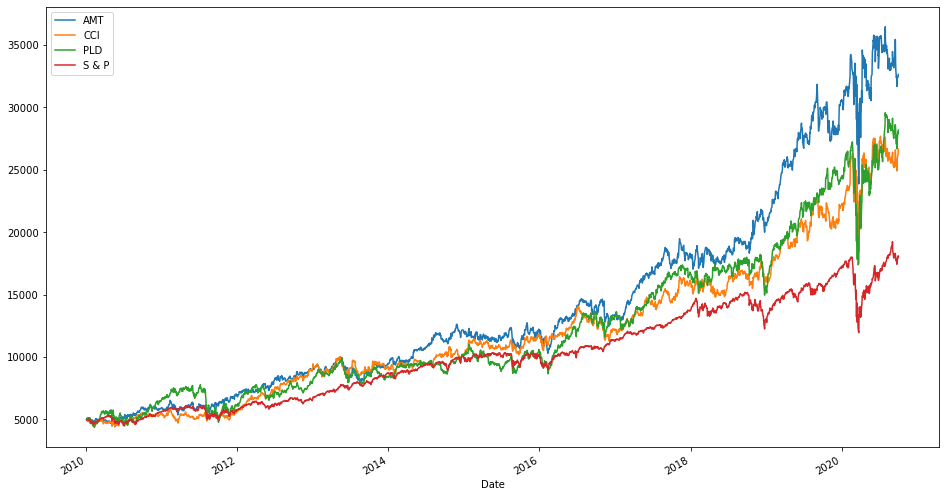

In [17]:
accumulation.plot(figsize=(16,9))
plt.savefig('REITs.png')